<a href="https://colab.research.google.com/github/ChandanMalviya-Code-Ninjas/AmazonClone/blob/main/Human_Activity_Recognition_Using_Smart_Phone_Device.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing necessary libraries**

In [41]:
# Importing necessary libraries for data analysis and visualization
import pandas as pd  # Used for data manipulation and analysis
import numpy as np  # Used for numerical operations on arrays

# Libraries for data visualization
import seaborn as sns  # Used for creating attractive and informative statistical graphics
import matplotlib.pyplot as plt  # Used for plotting graphs
%matplotlib inline
 # Allows plots to appear within the Jupyter Notebook output

# Suppressing any warnings for a cleaner output
import warnings
warnings.filterwarnings("ignore")  # Ignores warnings that may not be relevant to the analysis

# **Importing Data Sets**

In [42]:
# Loading the training dataset from the CSV file into a pandas DataFrame
train = pd.read_csv("train.csv")  # 'train.csv' should contain labeled data for training the model

# Loading the test dataset from the CSV file into a pandas DataFrame
test = pd.read_csv("test.csv")  # 'test.csv' should contain data for testing and making predictions


# **To Combine both the  data frames**

<BarContainer object of 6 artists>

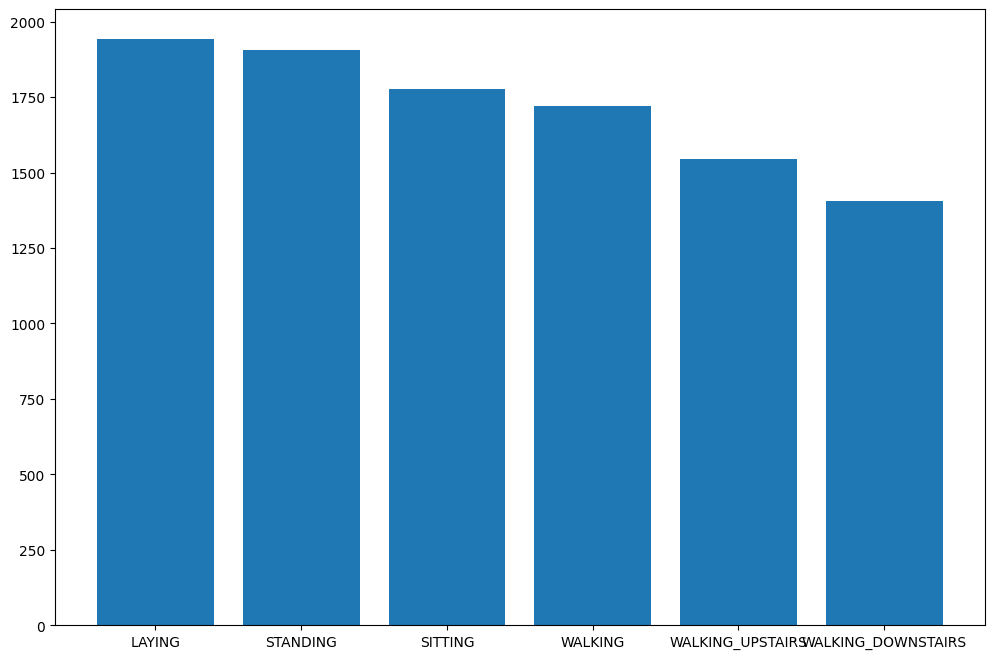

In [43]:
# Section 1: Adding a Column to Differentiate Train and Test Sets
train['Data'] = 'Train'  # Adds a 'Data' column to the train DataFrame, labeling rows as 'Train'
test['Data'] = 'Test'  # Adds a 'Data' column to the test DataFrame, labeling rows as 'Test'

# Section 2: Combining Train and Test DataFrames
both = pd.concat([train, test], axis=0).reset_index(drop=True)  # Concatenates train and test DataFrames along rows, resetting index
both['subject'] = '#' + both['subject'].astype(str)  # Prefixes each 'subject' value with '#', converting to string if necessary

# Displaying the shapes of train and test sets to verify size
train.shape, test.shape  # Outputs the dimensions of train and test DataFrames

# Viewing the first few rows of the combined DataFrame
both.head()  # Displays the first five rows of the 'both' DataFrame to inspect the merged data

# Section 3: Checking Data Types in the Combined DataFrame
both.dtypes.value_counts()  # Counts and displays the number of each data type in the 'both' DataFrame

# Section 4: Defining a Function for Basic Data Inspection
def basic_details(df):
    """
    Function to generate a summary DataFrame with:
    - Missing values count for each column
    - Number of unique values for each column
    - Data type of each column
    """
    b = pd.DataFrame()
    b['Missing value'] = df.isnull().sum()  # Counts missing values for each column
    b['N unique value'] = df.nunique()  # Counts unique values for each column
    b['dtype'] = df.dtypes  # Lists data types for each column
    return b

# Calling the function on the combined DataFrame
basic_details(both)  # Displays the basic details for 'both' DataFrame

# Section 5: Visualizing Activity Labels in the Combined Data
activity = both['Activity']  # Extracts the 'Activity' column for analysis
label_counts = activity.value_counts()  # Counts occurrences of each unique label in 'Activity'

# Plotting the distribution of activity labels
plt.figure(figsize=(12, 8))  # Sets the plot size
plt.bar(label_counts.index, label_counts)  # Creates a bar chart for 'Activity' label counts


# **To Scale the data**

In [44]:
# Standard Scaling for Numerical Features
from sklearn.preprocessing import StandardScaler  # Importing the StandardScaler for normalization

# Selecting only the numerical columns from the training set for scaling
numerical_features = train.select_dtypes(include=['number']).columns  # Identifies columns with numerical data types
train_numerical = train[numerical_features]  # Creates a DataFrame with only numerical features from the train set

# Applying standard scaling to numerical features to normalize their range
slc = StandardScaler()  # Initializing the StandardScaler
train_scaled = slc.fit_transform(train_numerical)  # Scaling the numerical features, output as an array

# Dimensionality Reduction Using PCA (Principal Component Analysis)
from sklearn.decomposition import PCA  # Importing PCA for dimensionality reduction
pca = PCA(n_components=0.9, random_state=0)  # Initializing PCA to retain 90% of the explained variance
train_pca = pca.fit_transform(train_scaled)  # Applying PCA on the scaled data

# Recombining Scaled/PCA Data with Original Non-Numerical Columns (if needed)
train_processed = pd.DataFrame(train_pca, index=train.index)  # Converts PCA-transformed array to DataFrame with original index
train_final = pd.concat([train.drop(columns=numerical_features), train_processed], axis=1)
# Concatenates non-numerical original columns with PCA-transformed data, creating the final processed training DataFrame


# **Splitting the  data into training and testing**

In [45]:
# Importing the train_test_split function for splitting data
from sklearn.model_selection import train_test_split

# Splitting the Data into Training and Testing Sets
# Using 'train['Activity']' as the target to maintain consistency with the train DataFrame
X_train, X_test, y_train, y_test = train_test_split(
    train.drop('Activity', axis=1),  # Features: All columns except 'Activity'
    train['Activity'],  # Target: 'Activity' column
    test_size=0.2,  # Allocates 20% of the data for the test set
    random_state=0  # Ensures reproducibility of the split by setting a fixed random state
)


# **Test options and evaluation metric**

In [46]:
# Setting Parameters for Cross-Validation and Evaluation
num_folds = 10  # Defines the number of folds for cross-validation (10-fold cross-validation)
seed = 0  # Sets a random seed for reproducibility in cross-validation and any random processes
scoring = 'accuracy'  # Specifies 'accuracy' as the evaluation metric for model performance

# Initializing Empty Dictionaries to Store Results
results = {}  # Dictionary to store cross-validation results for different models
accuracy = {}  # Dictionary to store accuracy scores for each model or fold


# **Activity Recognition Algorithm**

Column 'Data' could not be converted to numeric.
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       285
           SITTING       0.98      0.92      0.95       275
          STANDING       0.93      0.99      0.95       278
           WALKING       0.99      1.00      0.99       244
WALKING_DOWNSTAIRS       1.00      0.99      0.99       196
  WALKING_UPSTAIRS       0.99      1.00      1.00       193

          accuracy                           0.98      1471
         macro avg       0.98      0.98      0.98      1471
      weighted avg       0.98      0.98      0.98      1471



<Axes: >

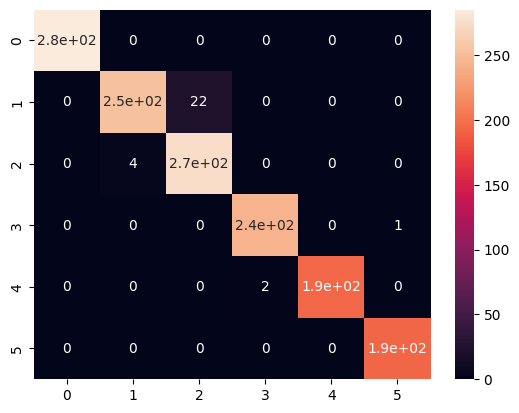

In [47]:
# Section 1: Model Import and Metrics Setup
from sklearn.neighbors import KNeighborsClassifier  # Importing K-Nearest Neighbors classifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report  # Importing evaluation metrics
from sklearn.model_selection import KFold, cross_val_score  # Importing cross-validation tools
import pandas as pd  # Importing pandas for data manipulation

# Section 2: Converting Non-Numeric Columns to Numeric
# Ensuring that all features in X_train are numeric, especially if any were categorical or problematic
for column in X_train.select_dtypes(include=['object']).columns:  # Identifies object-type columns in X_train
    if column in X_train.columns:  # Checks if the column still exists after conversion
        try:
            X_train[column] = pd.to_numeric(X_train[column])  # Tries to convert to numeric format
        except ValueError:
            print(f"Column '{column}' could not be converted to numeric.")  # Alerts if conversion fails
            # Handles columns that cannot be converted; here, we drop them as an example
            X_train = X_train.drop(column, axis=1)  # Drops column from training set
            X_test = X_test.drop(column, axis=1)  # Drops column from test set for consistency

# Section 3: Model Initialization and Cross-Validation
model = KNeighborsClassifier(algorithm='auto', n_neighbors=8, p=1, weights='distance')
# Initializes KNN with specific parameters: 8 neighbors, Manhattan distance (p=1), and distance-based weights

# Performing 10-fold cross-validation and storing the mean and standard deviation of accuracy scores
_ = cross_val_score(model, X_train, y_train, cv=10, scoring=scoring)  # Executes cross-validation
results["GScv"] = (_.mean(), _.std())  # Stores mean and std of cross-validation accuracy in results dictionary

# Section 4: Model Training and Prediction
model.fit(X_train, y_train)  # Fits the model to the training data
y_predict = model.predict(X_test)  # Predicts target values for the test data

# Storing the accuracy score of the model predictions
accuracy["GScv"] = accuracy_score(y_test, y_predict)  # Calculates accuracy score and stores it in accuracy dictionary

# Section 5: Model Evaluation and Confusion Matrix Visualization
print(classification_report(y_test, y_predict))  # Prints a detailed classification report (precision, recall, F1-score)

# Confusion Matrix and Heatmap Visualization
cm = confusion_matrix(y_test, y_predict)  # Creates confusion matrix for actual vs predicted labels
sns.heatmap(cm, annot=True)  # Visualizes the confusion matrix as a heatmap with annotations
